In [1]:
import pymc3 as pm
import scipy.stats as stats
from IPython.core.pylabtools import figsize
%matplotlib inline


The Philosophy of Bayesian Inference
------
  
> You are a skilled programmer, but bugs still slip into your code. After a particularly difficult implementation of an algorithm, you decide to test your code on a trivial example. It passes. You test the code on a harder problem. It passes once again. And it passes the next, *even more difficult*, test too! You are starting to believe that there may be no bugs in this code...

Bayesian inference is simply updating your beliefs after considering new evidence. A Bayesian can rarely be certain about a result, but he or she can be very confident. Just like in the example above, we can never be 100% sure that our code is bug-free unless we test it on every possible problem; something rarely possible in practice. Instead, we can test it on a large number of problems, and if it succeeds we can feel more *confident* about our code, but still not certain.  Bayesian inference works identically: we update our beliefs about an outcome; rarely can we be absolutely sure unless we rule out all other alternatives. 


### The Bayesian state of mind


Bayesian inference differs from more traditional statistical inference by preserving *uncertainty*. At first, this sounds like a bad statistical technique. Isn't statistics all about deriving *certainty* from randomness? To reconcile this, we need to start thinking like Bayesians. 

The Bayesian world-view interprets probability as measure of *believability in an event*, that is, how confident we are in an event occurring. In fact, we will see in a moment that this is the natural interpretation of probability. 

Bayesians have a intuitive approach. Bayesians interpret a probability as measure of *belief*, or confidence, of an event occurring. Simply, a probability is a summary of an opinion. An individual who assigns a belief of 0 to an event has no confidence that the event will occur; conversely, assigning a belief of 1 implies that the individual is absolutely certain of an event occurring. Beliefs between 0 and 1 allow for weightings of other outcomes. 

Different individuals have different beliefs of events occurring, because they possess different *information* about the world. The existence of different beliefs does not imply that anyone is wrong. Consider the following examples demonstrating the relationship between individual beliefs and probabilities:

- I flip a coin, and we both guess the result. We would both agree, assuming the coin is fair, that the probability of Heads is 1/2. Assume, then, that I peek at the coin. Now I know for certain what the result is: I assign probability 1.0 to either Heads or Tails (whichever it is). Now what is *your* belief that the coin is Heads? My knowledge of the outcome has not changed the coin's results. Thus we assign different probabilities to the result. 

-  Your code either has a bug in it or not, but we do not know for certain which is true, though we have a belief about the presence or absence of a bug.  

-  A medical patient is exhibiting symptoms $x$, $y$ and $z$. There are a number of diseases that could be causing all of them, but only a single disease is present. A doctor has beliefs about which disease, but a second doctor may have slightly different beliefs. 


This philosophy of treating beliefs as probability is natural to humans. We employ it constantly as we interact with the world and only see partial truths, but gather evidence to form beliefs. Alternatively, you have to be *trained* to think like a frequentist. 

To align ourselves with traditional probability notation, we denote our belief about event $A$ as $P(A)$. We call this quantity the *prior probability*.

John Maynard Keynes, a great economist and thinker, said "When the facts change, I change my mind. What do you do, sir?" This quote reflects the way a Bayesian updates his or her beliefs after seeing evidence. Even &mdash; especially &mdash; if the evidence is counter to what was initially believed, the evidence cannot be ignored. We denote our updated belief as $P(A |X )$, interpreted as the probability of $A$ given the evidence $X$. We call the updated belief the *posterior probability* so as to contrast it with the prior probability. For example, consider the posterior probabilities (read: posterior beliefs) of the above examples, after observing some evidence $X$:

1\. $P(A): \;\;$ the coin has a 50 percent chance of being Heads. $P(A | X):\;\;$ You look at the coin, observe a Heads has landed, denote this information $X$, and trivially assign probability 1.0 to Heads and 0.0 to Tails.

2\.   $P(A): \;\;$  This big, complex code likely has a bug in it. $P(A | X): \;\;$ The code passed all $X$ tests; there still might be a bug, but its presence is less likely now.

3\.  $P(A):\;\;$ The patient could have any number of diseases. $P(A | X):\;\;$ Performing a blood test generated evidence $X$, ruling out some of the possible diseases from consideration.


It's clear that in each example we did not completely discard the prior belief after seeing new evidence $X$, but we *re-weighted the prior* to incorporate the new evidence (i.e. we put more weight, or confidence, on some beliefs versus others). 

By introducing prior uncertainty about events, we are already admitting that any guess we make is potentially very wrong. After observing data, evidence, or other information, we update our beliefs, and our guess becomes *less wrong*. This is the alternative side of the prediction coin, where typically we try to be *more right*. 

### Bayesian Inference in Practice

 If frequentist and Bayesian inference were programming functions, with inputs being statistical problems, then the two would be different in what they return to the user. The frequentist inference function would return a number, representing an estimate (typically a summary statistic like the sample average etc.), whereas the Bayesian function would return *probabilities*.

For example, in our debugging problem above, calling the frequentist function with the argument "My code passed all $X$ tests; is my code bug-free?" would return a *YES*. On the other hand, asking our Bayesian function "Often my code has bugs. My code passed all $X$ tests; is my code bug-free?" would return something very different: probabilities of *YES* and *NO*. The function might return:

>    *YES*, with probability 0.8; *NO*, with probability 0.2

This is very different from the answer the frequentist function returned. Notice that the Bayesian function accepted an additional argument:  **"Often my code has bugs"**. This parameter is the **prior**. By including the prior parameter, we are telling the Bayesian function to include our belief about the situation. Technically this parameter in the Bayesian function is optional, but we will see excluding it has its own consequences. 


#### Incorporating evidence

This is where Bayesian analysis excels. By introducing a prior, and returning probabilities (instead of a scalar estimate), we *preserve the uncertainty* that reflects the instability of statistical inference of a small $N$ dataset. 

> Sample sizes are never large. If $N$ is too small to get a sufficiently-precise estimate, you need to get more data (or make more assumptions). But once $N$ is "large enough," you can start subdividing the data to learn more (for example, in a public opinion poll, once you have a good estimate for the entire country, you can estimate among men and women, northerners and southerners, different age groups, etc.). $N$ is never enough because if it were "enough" you'd already be on to the next problem for which you need more data.

The much more difficult analytic problems involve *medium data* and, especially troublesome, *really small data*. Using a similar argument as  Gelman's above, if big data problems are *big enough* to be readily solved, then we should be more interested in the *not-quite-big enough* datasets. 


_______

## Probability Distributions


**Let's quickly recall what a probability distribution is:** Let $Z$ be some random variable. Then associated with $Z$ is a *probability distribution function* that assigns probabilities to the different outcomes $Z$ can take. Graphically, a probability distribution is a curve where the probability of an outcome is proportional to the height of the curve. You can see examples in the first figure of this chapter. 

We can divide random variables into three classifications:

-   **$Z$ is discrete**: Discrete random variables may only assume values on a specified list. Things like populations, movie ratings, and number of votes are all discrete random variables. Discrete random variables become more clear when we contrast them with...

-   **$Z$ is continuous**: Continuous random variable can take on arbitrarily exact values. For example, temperature, speed, time, color are all modeled as continuous variables because you can progressively make the values more and more precise.

- **$Z$ is mixed**: Mixed random variables assign probabilities to both discrete and continuous random variables, i.e. it is a combination of the above two categories.

### Discrete Case
If $Z$ is discrete, then its distribution is called a *probability mass function*, which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$. Note that the probability mass function completely describes the random variable $Z$, that is, if we know the mass function, we know how $Z$ should behave.

We say $Z$ is *Poisson*-distributed if:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

$\lambda$ is called a parameter of the distribution, and it controls the distribution's shape. For the Poisson distribution, $\lambda$ can be any positive number. By increasing $\lambda$, we add more probability to larger values, and conversely by decreasing $\lambda$ we add more probability to smaller values. One can describe $\lambda$ as the *intensity* of the Poisson distribution. 

Unlike $\lambda$, which can be any positive number, the value $k$ in the above formula must be a non-negative integer, i.e., $k$ must take on values 0,1,2, and so on. This is very important, because if you wanted to model a population you could not make sense of populations with 4.25 or 5.612 members. 

If a random variable $Z$ has a Poisson mass distribution, we denote this by writing

$$Z \sim \text{Poi}(\lambda) $$

One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.:

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$

We will use this property often, so it's useful to remember.

Below, we plot the probability mass distribution for different $\lambda$ values. 

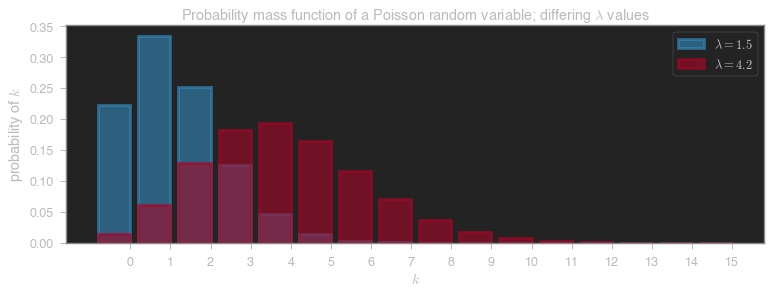

In [9]:
figsize(12.5, 4)

a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label=f"$\lambda = {lambda_[0]:.1f}$", alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label=f"$\lambda = {lambda_[1]:.1f}$", alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values");

The first thing to notice is that by increasing $\lambda$, we add more probability of larger values occurring. Second, notice that although the graph ends at 15, the distributions do not. They assign positive probability to every non-negative integer.

### Continuous Case
Instead of a probability mass function, a continuous random variable has a *probability density function*. The density function for an exponential random variable looks like this:

$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$

Like a Poisson random variable, an exponential random variable can take on only non-negative values. But unlike a Poisson variable, the exponential can take on *any* non-negative values, including non-integral values such as 4.25 or 5.612401. This property makes it a poor choice for count data, which must be an integer, but a great choice for time data, temperature data (measured in Kelvins, of course), or any other precise *and positive* variable. The graph below shows two probability density functions with different $\lambda$ values. 

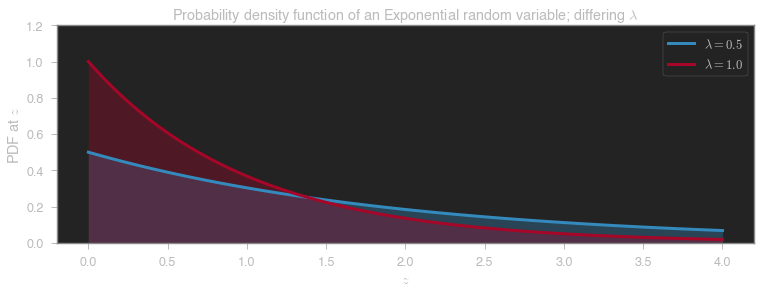

In [9]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label=f"$\lambda = {l:.1f}$")
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0,1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

When a random variable $Z$ has an exponential distribution with parameter $\lambda$, we say *$Z$ is exponential* and write

$$Z \sim \text{Exp}(\lambda)$$

Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$


### But what is $\lambda \;$?

Bayesian inference is concerned with *beliefs* about what $\lambda$ might be. Rather than try to guess $\lambda$ exactly, we can only talk about what $\lambda$ is likely to be by assigning a probability distribution to $\lambda$.

Recall that under Bayesian philosophy, we *can* assign probabilities if we interpret them as beliefs. And it is entirely acceptable to have *beliefs* about the parameter $\lambda$. 


#### What do our posterior probabilities look like when we have little data, versus when we have lots of data?

Below we plot a sequence of updating posterior probabilities as we observe increasing amounts of data (coin flips).

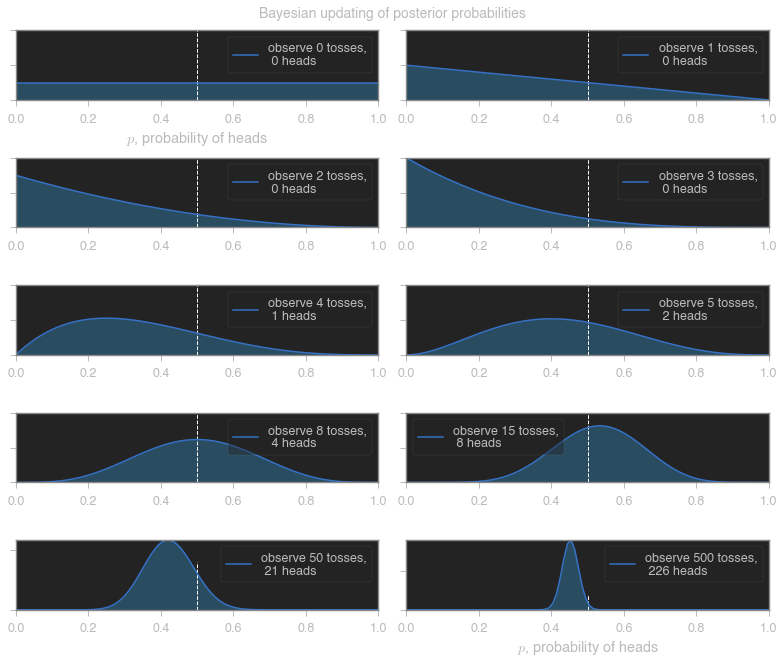

In [19]:
figsize(11, 9)

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label=f"observe {N} tosses,\n {heads} heads")
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="w", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

The posterior probabilities are represented by the curves, and our uncertainty is proportional to the width of the curve. As the plot above shows, as we start to observe data our posterior probabilities start to shift and move around. Eventually, as we observe more and more data (coin-flips), our probabilities will tighten closer and closer around the true value of $p=0.5$ (marked by a dashed line).

---

In [20]:
with pm.Model() as model:
    lambda_1 = pm.Exponential('lambda_1', 1.0)
    lambda_2 = pm.Exponential('lambda_2', 1.0)
    tau = pm.DiscreteUniform('tau', lower=0, upper=10)
    
new_deterministic_variable = lambda_1 + lambda_2

n_data_points = 5
idx = np.arange(n_data_points)

with model:
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)

#### What does my prior distribution of $\lambda_1$ look like?

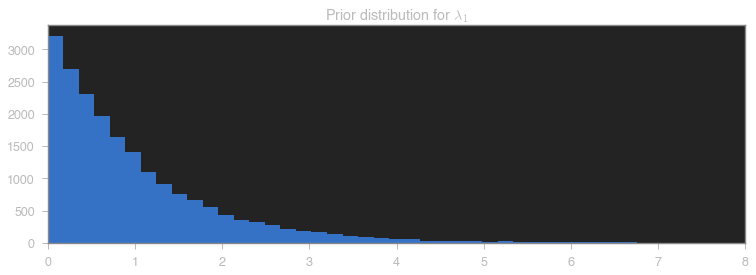

In [21]:
figsize(12.5, 4)

samples = lambda_1.random(size=20_000)
plt.hist(samples, bins=70, histtype='stepfilled')
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0, 8);

#### How to include data/evidence/observations $X$ into our model?

PyMC3 stochastic variables have a keyword argument `observed`. The keyword `observed` has a very simple role: fix the variable's current value to be the given data, typically a NumPy `array` or pandas `DataFrame`. For example:

In [22]:
data = np.array([5, 10])

with model:
    fixed_variable = pm.Poisson('fxd', 1, observed=data)
    
print(f'{fixed_variable.tag.test_value}')

[ 5 10]


This is how we include data into our models: initializing a stochastic variable to have a *fixed value*. 

To complete our example, we fix the PyMC3 variable `observations` to the observed dataset. 

In [23]:
data = np.array([10, 25, 15, 35, 5])

with model:
    obs = pm.Poisson('obs', lambda_, observed=data)
    
print(f'{obs.tag.test_value}')

[10 25 15 35  5]


#### How to simulate a possible realization of the dataset?

1\. Specify when the user's behaviour switches by sampling from $\text{DiscreteUniform}(0, 80)$:

In [29]:
tau = np.random.randint(0, 80)
tau

62

2\. Draw $\lambda_1$ and $\lambda_2$ from an $\text{Exp}(\alpha)$ distribution:

In [30]:
alpha = 1./20.
lambda_1, lambda_2 = np.random.exponential(scale=1/alpha, size=2)

3\.  For days before $\tau$, represent the user's received SMS count by sampling from $\text{Poi}(\lambda_1)$, and sample from  $\text{Poi}(\lambda_2)$ for days after $\tau$. For example:

In [31]:
data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau),
             stats.poisson.rvs(mu=lambda_2, size=80 - tau)]

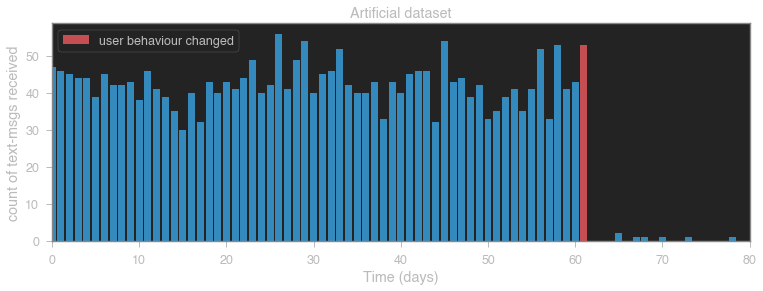

In [32]:
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau-1, data[tau - 1], color="r", label="user behaviour changed")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Artificial dataset")
plt.xlim(0, 80)
plt.legend();

#### How to produce more artificial datasets?

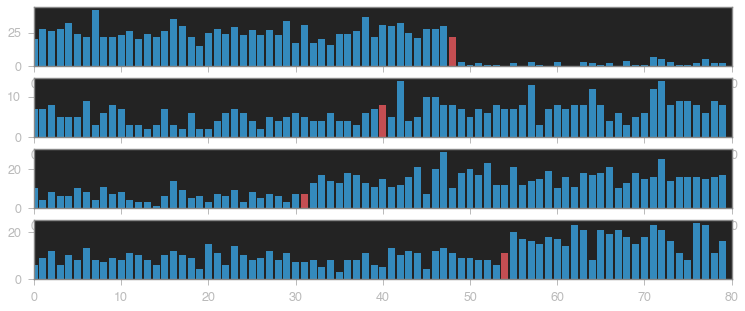

In [33]:
def plot_artificial_sms_dataset():
    tau = stats.randint.rvs(0, 80)
    alpha = 1./20.
    lambda_1, lambda_2 = stats.expon.rvs(scale=1/alpha, size=2)
    data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau), 
                 stats.poisson.rvs(mu=lambda_2, size=80 - tau)]
    plt.bar(np.arange(80), data, color="#348ABD")
    plt.bar(tau - 1, data[tau-1], color="r", label="user behaviour changed")
    plt.xlim(0, 80);

figsize(12.5, 5)
plt.title("More example of artificial datasets")
for i in range(4):
    plt.subplot(4, 1, i+1)
    plot_artificial_sms_dataset()

---

### PyMC3 Variables

All PyMC3 variables have an initial value (i.e. test value).

The `test_value` is used only for the model, as the starting point for sampling if no other start is specified. It will not change as a result of sampling. This initial state can be changed at variable creation by specifying a value for the `testval` parameter.

In [10]:
with pm.Model() as model:
    parameter = pm.Exponential('poisson_param', 1.0, testval=.5)
    
print(f"parameter.tag.test_value = {parameter.tag.test_value:.2f}")

parameter.tag.test_value = 0.50


This can be helpful if you are using a more unstable prior that may require a better starting point.

PyMC3 is concerned with two types of programming variables: stochastic and deterministic.

*  *stochastic variables* are variables that are not deterministic, i.e., even if you knew all the values of the variables' parameters and components, it would still be random. Included in this category are instances of classes `Poisson`, `DiscreteUniform`, and `Exponential`.

*  *deterministic variables* are variables that are not random if the variables' parameters and components were known. This might be confusing at first: a quick mental check is *if I knew all of variable `foo`'s component variables, I could determine what `foo`'s value is.* 

#### Initializing Stochastic variables

Initializing a stochastic, or random, variable requires a `name` argument, plus additional parameters that are class specific. For example:

`some_variable = pm.DiscreteUniform("discrete_uni_var", 0, 4)`

where 0, 4 are the `DiscreteUniform`-specific lower and upper bound on the random variable.

The `name` attribute is used to retrieve the posterior distribution later in the analysis, so it is best to use a descriptive name.

For multivariable problems, rather than creating a Python array of stochastic variables, addressing the `shape` keyword in the call to a stochastic variable creates multivariate array of (independent) stochastic variables. The array behaves like a NumPy array when used like one, and references to its `tag.test_value` attribute return NumPy arrays.  

The `shape` argument also solves the annoying case where you may have many variables $\beta_i, \; i = 1,...,N$ you wish to model. Instead of creating arbitrary names and variables for each one, like:

    beta_1 = pm.Uniform("beta_1", 0, 1)
    beta_2 = pm.Uniform("beta_2", 0, 1)
    ...

we can instead wrap them into a single variable:

    betas = pm.Uniform("betas", 0, 1, shape=N)

#### Deterministic variables

    deterministic_variable = pm.Deterministic("deterministic variable", some_function_of_variables) 

Calling `pymc3.Deterministic` is the most obvious way, but not the only way, to create deterministic variables. Elementary operations, like addition, exponentials etc. implicitly create deterministic variables. For example, the following returns a deterministic variable:

In [11]:
with pm.Model() as model:
    lambda_1 = pm.Exponential('lambda_1', 1.0)
    lambda_2 = pm.Exponential('lambda_2', 1.0)
    tau = pm.DiscreteUniform('tau', lower=0, upper=10)
    
new_deterministic_variable = lambda_1 + lambda_2

If we want a `deterministic` variable to actually be tracked by our sampling, however, we need to define it explicitly as a named `deterministic` variable with the constructor.

In [14]:
n_data_points = 5
idx = np.arange(n_data_points)

with model:
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)

Clearly, if $\tau, \lambda_1$ and $\lambda_2$ are known, then $\lambda$ is known completely, hence it is a deterministic variable. We use the `switch` function here to change from $\lambda_1$ to $\lambda_2$ at the appropriate time.

---

## Modeling approaches

A good starting thought to Bayesian modeling is to think about *how your data might have been generated*. Position yourself in an omniscient position, and try to imagine how *you* would recreate the dataset. 

Reference to investigation of text message data. We begin by asking how our observations may have been generated:

1.  We started by thinking "what is the best random variable to describe this count data?" A Poisson random variable is a good candidate because it can represent count data. So we model the number of sms's received as sampled from a Poisson distribution.

2.  Next, we think, "Ok, assuming sms's are Poisson-distributed, what do I need for the Poisson distribution?" Well, the Poisson distribution has a parameter $\lambda$. 

3.  Do we know $\lambda$? No. In fact, we have a suspicion that there are *two* $\lambda$ values, one for the earlier behaviour and one for the later behaviour. We don't know when the behaviour switches though, but call the switchpoint $\tau$.

4. What is a good distribution for the two $\lambda$s? The exponential is good, as it assigns probabilities to positive real numbers. Well the exponential distribution has a parameter too, call it $\alpha$.

5.  Do we know what the parameter $\alpha$ might be? No. At this point, we could continue and assign a distribution to $\alpha$, but it's better to stop once we reach a set level of ignorance: whereas we have a prior belief about $\lambda$, ("it probably changes over time", "it's likely between 10 and 30", etc.), we don't really have any strong beliefs about $\alpha$. So it's best to stop here. 

What is a good value for $\alpha$ then? We think that the $\lambda$s are between 10-30, so if we set $\alpha$ really low (which corresponds to larger probability on high values) we are not reflecting our prior well. Similar, a too-high alpha misses our prior belief as well. A good idea for $\alpha$ as to reflect our belief is to set the value so that the mean of $\lambda$, given $\alpha$, is equal to our observed mean.

6. We have no expert opinion of when $\tau$ might have occurred. So we will suppose $\tau$ is from a discrete uniform distribution over the entire timespan.

PyMC3, and other probabilistic programming languages, have been designed to tell these data-generation *stories*. More generally, B. Cronin writes:

> Probabilistic programming will unlock narrative explanations of data, one of the holy grails of business analytics and the unsung hero of scientific persuasion. People think in terms of stories - thus the unreasonable power of the anecdote to drive decision-making, well-founded or not. But existing analytics largely fails to provide this kind of story; instead, numbers seemingly appear out of thin air, with little of the causal context that humans prefer when weighing their options.

### The Binomial Distribution

The binomial distribution is one of the most popular distributions, mostly because of its simplicity and usefulness. The binomial distribution has 2 parameters: $N$, a positive integer representing $N$ trials or number of instances of potential events, and $p$, the probability of an event occurring in a single trial. Like the Poisson distribution, it is a discrete distribution, but unlike the Poisson distribution, it only weighs integers from $0$ to $N$. The mass distribution looks like:

$$P( X = k ) =  {{N}\choose{k}}  p^k(1-p)^{N-k}$$

If $X$ is a binomial random variable with parameters $p$ and $N$, denoted $X \sim \text{Bin}(N,p)$, then $X$ is the number of events that occurred in the $N$ trials (obviously $0 \le X \le N$). The larger $p$ is (while still remaining between 0 and 1), the more events are likely to occur. The expected value of a binomial is equal to $Np$. Below we plot the mass probability distribution for varying parameters.

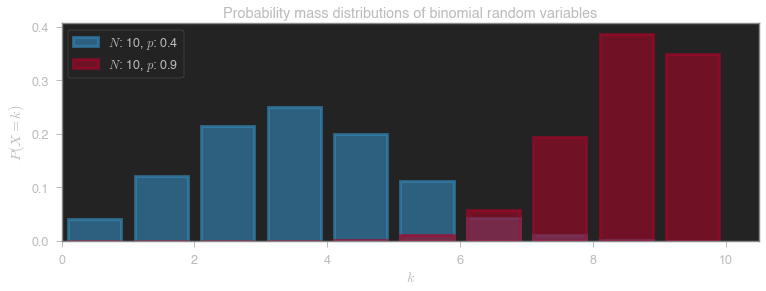

In [16]:
figsize(12.5, 4)

binomial = stats.binom

parameters = [(10, .4), (10, .9)]
colors = ["#348ABD", "#A60628"]

for i in range(2):
    N, p = parameters[i]
    _x = np.arange(N + 1)
    plt.bar(_x - 0.5, binomial.pmf(_x, N, p), color=colors[i],
            edgecolor=colors[i],
            alpha=0.6,
            label="$N$: %d, $p$: %.1f" % (N, p),
            linewidth=3)

plt.legend(loc="upper left")
plt.xlim(0, 10.5)
plt.xlabel("$k$")
plt.ylabel("$P(X = k)$")
plt.title("Probability mass distributions of binomial random variables");

The special case when $N = 1$ corresponds to the Bernoulli distribution. There is another connection between Bernoulli and Binomial random variables. If we have $X_1, X_2, ... , X_N$ Bernoulli random variables with the same $p$, then $Z = X_1 + X_2 + ... + X_N \sim \text{Binomial}(N, p )$.

The expected value of a Bernoulli random variable is $p$. This can be seen by noting the more general Binomial random variable has expected value $Np$ and setting $N=1$.

### Normal distributions

A Normal random variable, denoted $X \sim N(\mu, 1/\tau)$, has a distribution with two parameters: the mean, $\mu$, and the *precision*, $\tau$. Those familiar with the Normal distribution already have probably seen $\sigma^2$ instead of $\tau^{-1}$. They are in fact reciprocals of each other. The change was motivated by simpler mathematical analysis and is an artifact of older Bayesian methods. Just remember: the smaller $\tau$, the larger the spread of the distribution (i.e. we are more uncertain); the larger $\tau$, the tighter the distribution (i.e. we are more certain). Regardless, $\tau$ is always positive. 

The probability density function of a $N( \mu, 1/\tau)$ random variable is:

$$ f(x | \mu, \tau) = \sqrt{\frac{\tau}{2\pi}} \exp\left( -\frac{\tau}{2} (x-\mu)^2 \right) $$

We plot some different density functions below. 

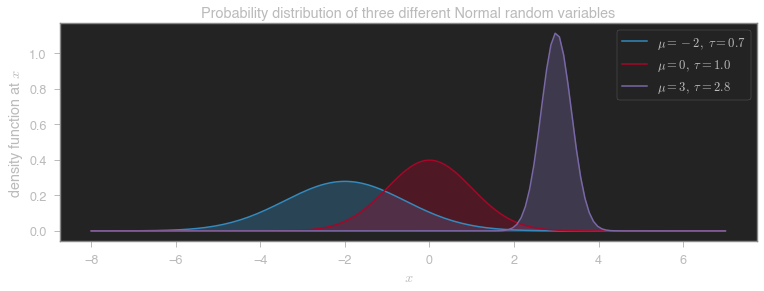

In [18]:
x = np.linspace(-8, 7, 150)
mu = (-2, 0, 3)
tau = (.7, 1, 2.8)
colors = ["#348ABD", "#A60628", "#7A68A6"]
parameters = zip(mu, tau, colors)

for _mu, _tau, _color in parameters:
    plt.plot(x, stats.norm.pdf(x, _mu, scale=1./_tau),
             label="$\mu = %d,\;\\tau = %.1f$" % (_mu, _tau), color=_color)
    plt.fill_between(x, nor.pdf(x, _mu, scale=1./_tau), color=_color,
                     alpha=.33)

plt.legend(loc="upper right")
plt.xlabel("$x$")
plt.ylabel("density function at $x$")
plt.title("Probability distribution of three different Normal random \
variables");

A Normal random variable can be take on any real number, but the variable is very likely to be relatively close to $\mu$. In fact, the expected value of a Normal is equal to its $\mu$ parameter:

$$ E[ X | \mu, \tau] = \mu$$

and its variance is equal to the inverse of $\tau$:

$$Var( X | \mu, \tau ) = \frac{1}{\tau}$$

---

### Exploring the landscape using the MCMC

We should explore the deformed posterior space generated by our prior surface and observed data to find the posterior mountain. However, we cannot naively search the space: any computer scientist will tell you that traversing $N$-dimensional space is exponentially difficult in $N$: the size of the space quickly blows-up as we increase $N$ (see [the curse of dimensionality](http://en.wikipedia.org/wiki/Curse_of_dimensionality)). What hope do we have to find these hidden mountains? The idea behind MCMC is to perform an intelligent search of the space. To say "search" implies we are looking for a particular point, which is perhaps not an accurate as we are really looking for a broad mountain. 

Recall that MCMC returns *samples* from the posterior distribution, not the distribution itself. Stretching our mountainous analogy to its limit, MCMC performs a task similar to repeatedly asking  "How likely is this pebble I found to be from the mountain I am searching for?", and completes its task by returning thousands of accepted pebbles in hopes of reconstructing the original mountain. In MCMC and PyMC3 lingo, the returned sequence of "pebbles" are the samples, cumulatively called the *traces*. 

When I say MCMC intelligently searches, I really am saying MCMC will *hopefully* converge towards the areas of high posterior probability. MCMC does this by exploring nearby positions and moving into areas with higher probability. Again, perhaps "converge" is not an accurate term to describe MCMC's progression. Converging usually implies moving towards a point in space, but MCMC moves towards a *broader area* in the space and randomly walks in that area, picking up samples from that area.

#### Why Thousands of Samples? 

Besides computational reasons, likely the strongest reason for returning samples is that we can easily use *The Law of Large Numbers* to solve otherwise intractable problems. With the thousands of samples, we can reconstruct the posterior surface by organizing them in a histogram. 


### Algorithms to perform MCMC

There is a large family of algorithms that perform MCMC. Most of these algorithms can be expressed at a high level as follows:

1. Start at current position.
2. Propose moving to a new position (investigate a pebble near you).
3. Accept/Reject the new position based on the position's adherence to the data and prior distributions (ask if the pebble likely came from the mountain).
4.  1.  If you accept: Move to the new position. Return to Step 1.
    2. Else: Do not move to new position. Return to Step 1. 
5. After a large number of iterations, return all accepted positions.

This way we move in the general direction towards the regions where the posterior distributions exist, and collect samples sparingly on the journey. Once we reach the posterior distribution, we can easily collect samples as they likely all belong to the posterior distribution. 

If the current position of the MCMC algorithm is in an area of extremely low probability, which is often the case when the algorithm begins (typically at a random location in the space), the algorithm will move in positions *that are likely not from the posterior* but better than everything else nearby. Thus the first moves of the algorithm are not reflective of the posterior.

In the above algorithm's pseudocode, notice that only the current position matters (new positions are investigated only near the current position). We can describe this property as *memorylessness*, i.e. the algorithm does not care *how* it arrived at its current position, only that it is there. 

## Useful tips for MCMC

Bayesian inference would be the *de facto* method if it weren't for MCMC's computational difficulties. In fact, MCMC is what turns most users off practical Bayesian inference. Below I present some good heuristics to help convergence and speed up the MCMC engine:

### Intelligent starting values

It would be great to start the MCMC algorithm off near the posterior distribution, so that it will take little time to start sampling correctly. We can aid the algorithm by telling where we *think* the posterior distribution will be by specifying the `testval` parameter in the `Stochastic` variable creation. In many cases we can produce a reasonable guess for the parameter. For example, if we have data from a Normal distribution, and we wish to estimate the $\mu$ parameter, then a good starting value would be the *mean* of the data. 

     mu = pm.Uniform( "mu", 0, 100, testval = data.mean() )

For most parameters in models, there is a frequentist estimate of it. These estimates are a good starting value for our MCMC algorithms. Of course, this is not always possible for some variables, but including as many appropriate initial values is always a good idea. Even if your guesses are wrong, the MCMC will still converge to the proper distribution, so there is little to lose.

This is what using `MAP` tries to do, by giving good initial values to the MCMC. So why bother specifying user-defined values? Well, even giving `MAP` good values will help it find the maximum a-posterior. 

Also important, *bad initial values* are a source of major bugs in PyMC3 and can hurt convergence.

#### Priors

If the priors are poorly chosen, the MCMC algorithm may not converge, or atleast have difficulty converging. Consider what may happen if the prior chosen does not even contain the true parameter: the prior assigns 0 probability to the unknown, hence the posterior will assign 0 probability as well. This can cause pathological results.

For this reason, it is best to carefully choose the priors. Often, lack of covergence or evidence of samples crowding to boundaries implies something is wrong with the chosen priors (see *Folk Theorem of Statistical Computing* below). 

#### Covariance matrices and eliminating parameters

### The Folk Theorem of Statistical Computing

>   *If you are having computational problems, probably your model is wrong.*

---

### The Law of Large Numbers

Let $Z_i$ be $N$ independent samples from some probability distribution. According to *the Law of Large numbers*,  so long as the expected value $E[Z]$ is finite, the following holds,

$$\frac{1}{N} \sum_{i=1}^N Z_i \rightarrow E[ Z ],  \;\;\; N \rightarrow \infty.$$

In words:

>   The average of a sequence of random variables from the same distribution converges to the expected value of that distribution.

This may seem like a boring result, but it will be the most useful tool you use.

### Intuition 

If the above Law is somewhat surprising,  it can be made more clear by examining a simple example. 

Consider a random variable $Z$ that can take only two values, $c_1$ and $c_2$. Suppose we have a large number of samples of $Z$, denoting a specific sample $Z_i$. The Law says that we can approximate the expected value of $Z$ by averaging over all samples. Consider the average:


$$ \frac{1}{N} \sum_{i=1}^N \;Z_i $$


By construction, $Z_i$ can only take on $c_1$ or $c_2$, hence we can partition the sum over these two values:

\begin{align}
\frac{1}{N} \sum_{i=1}^N \;Z_i
& =\frac{1}{N} \big(  \sum_{ Z_i = c_1}c_1 + \sum_{Z_i=c_2}c_2 \big) \\\\[5pt]
& = c_1 \sum_{ Z_i = c_1}\frac{1}{N} + c_2 \sum_{ Z_i = c_2}\frac{1}{N} \\\\[5pt]
& = c_1 \times \text{ (approximate frequency of $c_1$) } \\\\ 
& \;\;\;\;\;\;\;\;\; + c_2 \times \text{ (approximate frequency of $c_2$) } \\\\[5pt]
& \approx c_1 \times P(Z = c_1) + c_2 \times P(Z = c_2 ) \\\\[5pt]
& = E[Z]
\end{align}


Equality holds in the limit, but we can get closer and closer by using more and more samples in the average. This Law holds for almost *any distribution*, minus some important cases we will encounter later.

##### Example
____


Below is a diagram of the Law of Large numbers in action for three different sequences of Poisson random variables. 

 We sample `sample_size = 100_000` Poisson random variables with parameter $\lambda = 4.5$. (Recall the expected value of a Poisson random variable is equal to its parameter.) We calculate the average for the first $n$ samples, for $n=1$ to `sample_size`. 

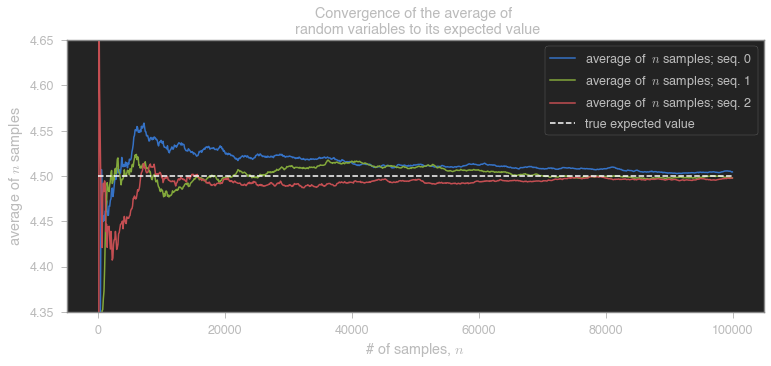

In [2]:
figsize(12.5, 5)

sample_size = 100_000
expected_value = lambda_ = 4.5
poi = np.random.poisson
N_samples = range(1, sample_size, 100)

for k in range(3):
    samples = poi(lambda_, sample_size)
    partial_average = [samples[:i].mean() for i in N_samples]
    plt.plot(N_samples, partial_average, lw=1.5, label=f"average \
of  $n$ samples; seq. {k}")

plt.plot(N_samples, expected_value * np.ones_like(partial_average),
         ls="--", label="true expected value", c="w")

plt.ylim(4.35, 4.65)
plt.title("Convergence of the average of \n random variables to its \
expected value")
plt.ylabel("average of $n$ samples")
plt.xlabel("# of samples, $n$")
plt.legend();

Looking at the above plot, it is clear that when the sample size is small, there is greater variation in the average. All three paths *approach* the value 4.5, but just flirt with it as $N$ gets large. Mathematicians and statistician have another name for *flirting*: convergence. 

Another very relevant question we can ask is *how quickly am I converging to the expected value?* Let's plot something new. For a specific $N$, let's do the above trials thousands of times and compute how far away we are from the true expected value, on average. But wait &mdash; *compute on average*? This is simply the law of large numbers again! For example, we are interested in, for a specific $N$, the quantity:

$$D(N) = \sqrt{ \;E\left[\;\; \left( \frac{1}{N}\sum_{i=1}^NZ_i  - 4.5 \;\right)^2 \;\;\right] \;\;}$$

The above formulae is interpretable as a distance away from the true value (on average), for some $N$. (We take the square root so the dimensions of the above quantity and our random variables are the same). As the above is an expected value, it can be approximated using the law of large numbers: instead of averaging $Z_i$, we calculate the following multiple times and average them:

$$ Y_k = \left( \;\frac{1}{N}\sum_{i=1}^NZ_i  - 4.5 \; \right)^2 $$

By computing the above many, $N_y$, times (remember, it is random), and averaging them:

$$ \frac{1}{N_Y} \sum_{k=1}^{N_Y} Y_k \rightarrow E[ Y_k ] = E\;\left[\;\; \left( \frac{1}{N}\sum_{i=1}^NZ_i  - 4.5 \;\right)^2 \right]$$

Finally, taking the square root:

$$ \sqrt{\frac{1}{N_Y} \sum_{k=1}^{N_Y} Y_k} \approx D(N) $$ 

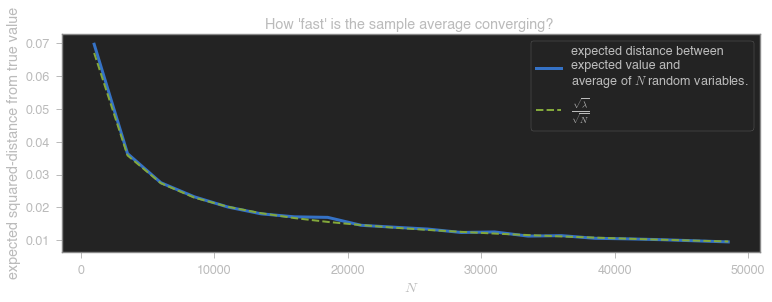

In [37]:
figsize(12.5, 4)

N_Y = 250  # use this many to approximate D(N)
N_array = np.arange(1000, 50_000, 2500)  # use this many samples in the approx. to the variance.
D_N_results = np.zeros(len(N_array))

lambda_ = 4.5
expected_value = lambda_  # for X ~ Poi(lambda) , E[ X ] = lambda


def D_N(n):
    """
    This function approx. D_n, the average variance of using n samples.
    """
    Z = poi(lambda_, (n, N_Y))
    average_Z = Z.mean(axis=0)
    return np.sqrt(((average_Z - expected_value) ** 2).mean())


for i, n in enumerate(N_array):
    D_N_results[i] = D_N(n)

plt.xlabel("$N$")
plt.ylabel("expected squared-distance from true value")
plt.plot(N_array, D_N_results, lw=3,
         label="expected distance between\n\
expected value and \naverage of $N$ random variables.")
plt.plot(N_array, np.sqrt(expected_value) / np.sqrt(N_array), lw=2, ls="--",
         label=r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$")
plt.legend()
plt.title("How 'fast' is the sample average converging? ");

As expected, the expected distance between our sample average and the actual expected value shrinks as $N$ grows large. But also notice that the *rate* of convergence decreases, that is, we need only 10_000 additional samples to move from 0.020 to 0.015, a difference of 0.005, but *20_000* more samples to again decrease from 0.015  to 0.010, again only a 0.005 decrease.

It turns out we can measure this rate of convergence. Above I have plotted a second line, the function $\sqrt{\lambda}/\sqrt{N}$. This was not chosen arbitrarily. In most cases, given a sequence of random variable distributed like $Z$, the rate of convergence to $E[Z]$ of the Law of Large Numbers is 

$$ \frac{ \sqrt{ \; Var(Z) \; } }{\sqrt{N} }$$

This is useful to know: for a given large $N$, we know (on average) how far away we are from the estimate. On the other hand, in a Bayesian setting, this can seem like a useless result: Bayesian analysis is OK with uncertainty so what's the *statistical* point of adding extra precise digits? Though drawing samples can be so computationally cheap that having a *larger* $N$ is fine too. 

### How do we compute $Var(Z)$ though?

The variance is simply another expected value that can be approximated! Consider the following, once we have the expected value (by using the Law of Large Numbers to estimate it, denote it $\mu$), we can estimate the variance:

$$ \frac{1}{N}\sum_{i=1}^N \;(Z_i - \mu)^2 \rightarrow E[ \;( Z - \mu)^2 \;] = Var( Z )$$

### Expected values and probabilities 
There is an even less explicit relationship between expected value and estimating probabilities. Define the *indicator function*

$$\mathbb{1}_A(x) = 
\begin{cases} 1 &  x \in A \\\\
              0 &  else
\end{cases}
$$
Then, by the law of large numbers, if we have many samples $X_i$, we can estimate the probability of an event $A$, denoted $P(A)$, by:

$$ \frac{1}{N} \sum_{i=1}^N \mathbb{1}_A(X_i) \rightarrow E[\mathbb{1}_A(X)] =  P(A) $$

Again, this is fairly obvious after a moments thought: the indicator function is only 1 if the event occurs, so we are summing only the times the event occurs and dividing by the total number of trials  (consider how we usually approximate probabilities using frequencies). For example, suppose we wish to estimate the probability that a $Z \sim Exp(.5)$ is greater than 5, and we have many samples from a $Exp(.5)$ distribution. 

$$ P( Z > 5 ) =  \frac{1}{N}\sum_{i=1}^N \mathbb{1}_{z > 5 }(Z_i) $$

In [38]:
N = 10_000
print(np.mean([np.random.exponential(.5) > 5 for i in range(N)]))

0.0002


### What does this all have to do with Bayesian statistics? 


*Point estimates*, in Bayesian inference are computed using expected values. In more analytical Bayesian inference, we would have been required to evaluate complicated expected values represented as multi-dimensional integrals. No longer. If we can sample from the posterior distribution directly, we simply need to evaluate averages. Much easier. If accuracy is a priority, plots like the ones above show how fast you are converging. And if further accuracy is desired, just take more samples from the posterior. 

When is enough enough? When can you stop drawing samples from the posterior? That is the practitioners decision, and also dependent on the variance of the samples (recall from above a high variance means the average will converge slower). 

We also should understand when the Law of Large Numbers fails. As the name implies, and comparing the graphs above for small $N$, the Law is only true for large sample sizes. Without this, the asymptotic result is not reliable. Knowing in what situations the Law fails can give us *confidence in how unconfident we should be*. The next section deals with this issue.

## The Disorder of Small Numbers

The Law of Large Numbers is only valid as $N$ gets *infinitely* large: never truly attainable.  While the law is a powerful tool, it is foolhardy to apply it liberally. Our next example illustrates this.

##### Aggregated geographic data

Often data comes in aggregated form. For instance, data may be grouped by state, county, or city level. Of course, the population numbers vary per geographic area. If the data is an average of some characteristic of each the geographic areas, we must be conscious of the Law of Large Numbers and how it can *fail* for areas with small populations.

We will observe this on a toy dataset. Suppose there are five thousand counties in our dataset. Furthermore,  population number in each state are uniformly distributed between 100 and 1500. The way the population numbers are generated is irrelevant to the discussion, so we do not justify this. We are interested in measuring the average height of individuals per county. Unbeknownst to us, height does **not** vary across county, and each individual, regardless of the county he or she is currently living in, has the same distribution of what their height may be:

$$ \text{height} \sim \text{Normal}(150, 15 ) $$

We aggregate the individuals at the county level, so we only have data for the *average in the county*. What might our dataset look like?

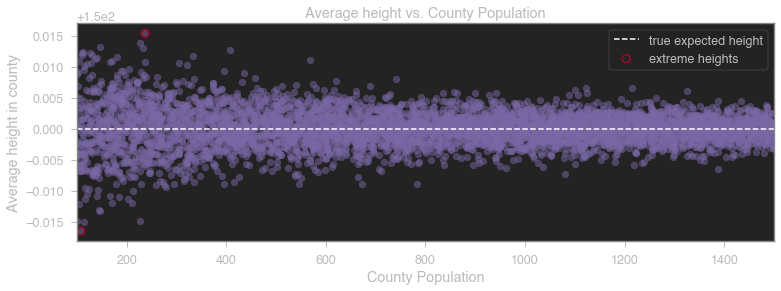

In [43]:
figsize(12.5, 4)
std_height = 15
mean_height = 150

n_counties = 5000
pop_generator = np.random.randint
norm = np.random.normal

# generate some artificial population numbers
population = pop_generator(100, 1500, n_counties)

average_across_county = np.zeros(n_counties)
for i in range(n_counties):
    # generate some individuals and take the mean
    average_across_county[i] = norm(mean_height, 1. / std_height,
                                    population[i]).mean()

# located the counties with the apparently most extreme average heights
i_min = np.argmin(average_across_county)
i_max = np.argmax(average_across_county)

# plot population size vs. recorded average
plt.scatter(population, average_across_county, alpha=0.5, c="#7A68A6")
plt.scatter([population[i_min], population[i_max]],
            [average_across_county[i_min], average_across_county[i_max]],
            s=60, marker="o", facecolors="none",
            edgecolors="#A60628", linewidths=1.5,
            label="extreme heights")

plt.xlim(100, 1500)
plt.title("Average height vs. County Population")
plt.xlabel("County Population")
plt.ylabel("Average height in county")
plt.plot([100, 1500], [150, 150], color="w", label="true expected \
height", ls="--")
plt.legend(scatterpoints=1);

What do we observe? *Without accounting for population sizes* we run the risk of making an enormous inference error: if we ignored population size, we would say that the county with the shortest and tallest individuals have been correctly circled. But this inference is wrong for the following reason. These two counties do *not* necessarily have the most extreme heights. The error results from the calculated average of smaller populations not being a good reflection of the true expected value of the population (which in truth should be $\mu =150$). The sample size/population size/$N$, whatever you wish to call it, is simply too small to invoke the Law of Large Numbers effectively. 

We provide more damning evidence against this inference. Recall the population numbers were uniformly distributed over 100 to 1500. Our intuition should tell us that the counties with the most extreme population heights should also be uniformly spread over 100 to 1500, and certainly independent of the county's population. Not so. Below are the population sizes of the counties with the most extreme heights.

In [44]:
print(f'Population sizes of 10 "shortest" counties: '
      f'{population[np.argsort(average_across_county[:10])]}')
print()
print(f'Population sizes of 10 "tallest" counties: '
      f'{population[np.argsort(-average_across_county[:10])]}')

Population sizes of 10 "shortest" counties: [ 961  930  635 1097  724  734  567  718  138  238]

Population sizes of 10 "tallest" counties: [ 238  138  718  567  734  724 1097  635  930  961]


Not at all uniform over 100 to 1500. This is an absolute failure of the Law of Large Numbers.

#### *U.S. Census Return Rate Challenge*

Below is data from the 2010 US census, which partitions populations beyond counties to the level of block groups (which are aggregates of city blocks or equivalents). The objective was to predict the census letter mail-back rate of a group block, measured between 0 and 100, using census variables (median income, number of females in the block-group, number of trailer parks, average number of children etc.). Below we plot the census mail-back rate versus block group population:

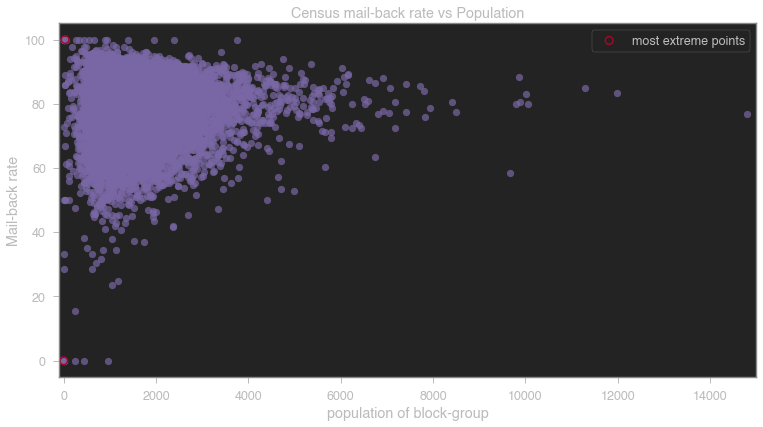

In [53]:
figsize(12.5, 6.5)
data = np.genfromtxt("../data/census_data.csv", skip_header=1,
                     delimiter=",")
plt.scatter(data[:, 1], data[:, 0], alpha=0.7, c="#7A68A6")
plt.title("Census mail-back rate vs Population")
plt.ylabel("Mail-back rate")
plt.xlabel("population of block-group")
plt.xlim(-100, 15e3)
plt.ylim(-5, 105)

i_min = np.argmin(data[:, 0])
i_max = np.argmax(data[:, 0])

plt.scatter([data[i_min, 1], data[i_max, 1]],
            [data[i_min, 0], data[i_max, 0]],
            s=60, marker="o", facecolors="none",
            edgecolors="#A60628", linewidths=1.5,
            label="most extreme points")

plt.legend(scatterpoints=1);

The above is a classic phenomenon in statistics. I say *classic* referring to the "shape" of the scatter plot above. It follows a classic triangular form, that tightens as we increase the sample size (as the Law of Large Numbers becomes more exact). 

I am perhaps overstressing the point, but here again is an example of the trouble with *small datasets*, not big ones. Simply, small datasets cannot be processed using the Law of Large Numbers. Compare with applying the Law without hassle to big datasets (ex. big data). I mentioned earlier that paradoxically big data prediction problems are solved by relatively simple algorithms. The paradox is partially resolved by understanding that the Law of Large Numbers creates solutions that are *stable*, i.e. adding or subtracting a few data points will not affect the solution much. On the other hand, adding or removing data points to a small dataset can create very different results. 

For further reading on the hidden dangers of the Law of Large Numbers, I would highly recommend the excellent manuscript [The Most Dangerous Equation](http://nsm.uh.edu/~dgraur/niv/TheMostDangerousEquation.pdf). 

### Conclusion

While the Law of Large Numbers is cool, it is only true so much as its name implies: with large sample sizes only. We have seen how our inference can be affected by not considering *how the data is shaped*. 

1. By (cheaply) drawing many samples from the posterior distributions, we can ensure that the Law of Large Number applies as we approximate expected values.

2. Bayesian inference understands that with small sample sizes, we can observe wild randomness. Our posterior distribution will reflect this by being more spread rather than tightly concentrated. Thus, our inference should be correctable.

3. There are major implications of not considering the sample size, and trying to sort objects that are unstable leads to pathological orderings. The method provided above solves this problem.

---